#Libraries

In [1]:
pip install transformers

In [2]:
import torch
import pandas as pd
from transformers import BertTokenizer
from torch.utils.data import Dataset, DataLoader
from transformers import BertForSequenceClassification, AdamW
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from tqdm import tqdm

#Dataset

In [3]:
from google.colab import drive
drive.mount('//content//drive')

Mounted at //content//drive


In [4]:
df=pd.read_excel("/content/drive/MyDrive/DS_CSE 438/Dataset/UrduDataset/Urdu Tweets Dataset.xlsx")

#Overview Of Dataset


In [5]:
df

,Id,Text,Emotions,Category
0,1313165582020349952,.Assalam Alikum 🦋😊 اے ایمان والو میرے دشم...,"['SMILING FACE WITH SMILING EYES , 0.644']",Joy
1,1314653586509488128,- '' 🍀 🌾 🌴 '' - ﺍﮬﺪِﻧَﺎﻟﺼِّﺮَﺍﻁَ ﺍَﻟﻤُﺴﺘَﻘِﯿﻢ...,"['HEAVY BLACK HEART , 0.746', 'SPARKLES , 0.35...",NaN
2,1311404383071067904,💕 میں نہیں کرتی اُس کا ذکر کسی تیسرے کے سات...,"['TWO HEARTS , 0.632']",NaN
3,1313508198876433920,.🌿.. ﴿کے میشود تمامِ جـهان سـوےِ کربـلا با ک...,"['HERB , 0.384']",NaN
4,1313510191405596928,.🌿.. ﴿کے میشود تمامِ جـهان سـوےِ کربـلا با ک...,"['HERB , 0.384']",NaN
...,...,...,...,...
1047995,1318648984609632000,باتیں ڈیفنس والی اوقات شاہدرے والی 😂😂😂😂,"['FACE WITH TEARS OF JOY , 0.221']",['Joy']
1047996,1318648980243418880,هههههههههههههههههههههههههههههههههههههههههههههه...,"['FACE WITH TEARS OF JOY , 0.221']",['Joy']
1047997,1318648979031233024,سیاستدان جتنی بھی کوششیں کر لیں ملک کی سلامتی ...,"['PERSON RAISING BOTH HANDS IN CELEBRATION , 0...",['Joy']
1047998,1318648969644356096,خان صاحب آپ صرف مہنگائی پر توجہ دیں ان اپوزیشن...,"['FLEXED BICEPS , 0.555']",NaN


In [6]:
df1=df

In [7]:
df2= df1.shape
df2

(1048000, 4)

#Data Preprocessing

In [ ]:
df1

,Id,Text,Emotions,Category
0,1313165582020349952,.Assalam Alikum 🦋😊 اے ایمان والو میرے دشم...,"['SMILING FACE WITH SMILING EYES , 0.644']",Joy
1,1314653586509488128,- '' 🍀 🌾 🌴 '' - ﺍﮬﺪِﻧَﺎﻟﺼِّﺮَﺍﻁَ ﺍَﻟﻤُﺴﺘَﻘِﯿﻢ...,"['HEAVY BLACK HEART , 0.746', 'SPARKLES , 0.35...",NaN
2,1311404383071067904,💕 میں نہیں کرتی اُس کا ذکر کسی تیسرے کے سات...,"['TWO HEARTS , 0.632']",NaN
3,1313508198876433920,.🌿.. ﴿کے میشود تمامِ جـهان سـوےِ کربـلا با ک...,"['HERB , 0.384']",NaN
4,1313510191405596928,.🌿.. ﴿کے میشود تمامِ جـهان سـوےِ کربـلا با ک...,"['HERB , 0.384']",NaN
...,...,...,...,...
1047995,1318648984609632000,باتیں ڈیفنس والی اوقات شاہدرے والی 😂😂😂😂,"['FACE WITH TEARS OF JOY , 0.221']",['Joy']
1047996,1318648980243418880,هههههههههههههههههههههههههههههههههههههههههههههه...,"['FACE WITH TEARS OF JOY , 0.221']",['Joy']
1047997,1318648979031233024,سیاستدان جتنی بھی کوششیں کر لیں ملک کی سلامتی ...,"['PERSON RAISING BOTH HANDS IN CELEBRATION , 0...",['Joy']
1047998,1318648969644356096,خان صاحب آپ صرف مہنگائی پر توجہ دیں ان اپوزیشن...,"['FLEXED BICEPS , 0.555']",NaN


In [8]:
df3 = df1.drop('Emotions', axis=1)

In [9]:
df3

,Id,Text,Category
0,1313165582020349952,.Assalam Alikum 🦋😊 اے ایمان والو میرے دشم...,Joy
1,1314653586509488128,- '' 🍀 🌾 🌴 '' - ﺍﮬﺪِﻧَﺎﻟﺼِّﺮَﺍﻁَ ﺍَﻟﻤُﺴﺘَﻘِﯿﻢ...,NaN
2,1311404383071067904,💕 میں نہیں کرتی اُس کا ذکر کسی تیسرے کے سات...,NaN
3,1313508198876433920,.🌿.. ﴿کے میشود تمامِ جـهان سـوےِ کربـلا با ک...,NaN
4,1313510191405596928,.🌿.. ﴿کے میشود تمامِ جـهان سـوےِ کربـلا با ک...,NaN
...,...,...,...
1047995,1318648984609632000,باتیں ڈیفنس والی اوقات شاہدرے والی 😂😂😂😂,['Joy']
1047996,1318648980243418880,هههههههههههههههههههههههههههههههههههههههههههههه...,['Joy']
1047997,1318648979031233024,سیاستدان جتنی بھی کوششیں کر لیں ملک کی سلامتی ...,['Joy']
1047998,1318648969644356096,خان صاحب آپ صرف مہنگائی پر توجہ دیں ان اپوزیشن...,NaN


In [10]:
dfmissing_values = df3.isna().sum()

In [11]:
dfmissing_values

Id               0
Text             0
Category    514571
dtype: int64

In [12]:
df4 = df3.dropna()
df4

,Id,Text,Category
0,1313165582020349952,.Assalam Alikum 🦋😊 اے ایمان والو میرے دشم...,Joy
19,1313508822825263104,Best lines زما دہ ملگروں زمہ اُمرہ زامن دی و...,"Joy , Joy"
29,1309937523020440064,⁧ ” تنظیم سازی⁩ ” کے لیے طلال چوہدری کی قربانی...,Joy
35,1313551779561443072,⁦☹️⁩ ہاں سب پتہ لگ گیا,Sad
47,1313448648932457984,️مُجھے پَسند ہے ️تُمھاری پِیشانی پر بوسہ دے کر...,Joy
...,...,...,...
1047994,1318648987264712960,شکر ہے فیصل بھائی آپ نے بھینس عمار مسعود کو ک...,['Joy']
1047995,1318648984609632000,باتیں ڈیفنس والی اوقات شاہدرے والی 😂😂😂😂,['Joy']
1047996,1318648980243418880,هههههههههههههههههههههههههههههههههههههههههههههه...,['Joy']
1047997,1318648979031233024,سیاستدان جتنی بھی کوششیں کر لیں ملک کی سلامتی ...,['Joy']


In [13]:
df5 = df4.drop('Id', axis=1)
df5

,Text,Category
0,.Assalam Alikum 🦋😊 اے ایمان والو میرے دشم...,Joy
19,Best lines زما دہ ملگروں زمہ اُمرہ زامن دی و...,"Joy , Joy"
29,⁧ ” تنظیم سازی⁩ ” کے لیے طلال چوہدری کی قربانی...,Joy
35,⁦☹️⁩ ہاں سب پتہ لگ گیا,Sad
47,️مُجھے پَسند ہے ️تُمھاری پِیشانی پر بوسہ دے کر...,Joy
...,...,...
1047994,شکر ہے فیصل بھائی آپ نے بھینس عمار مسعود کو ک...,['Joy']
1047995,باتیں ڈیفنس والی اوقات شاہدرے والی 😂😂😂😂,['Joy']
1047996,هههههههههههههههههههههههههههههههههههههههههههههه...,['Joy']
1047997,سیاستدان جتنی بھی کوششیں کر لیں ملک کی سلامتی ...,['Joy']


In [14]:
def most_common_word(lst):
    if type(lst) == list:
      from collections import Counter
      word_count = Counter(lst)
      return max(word_count, key=word_count.get)
    else:
      return lst.split(',')[0]
df5['Category'] = df5['Category'].apply(most_common_word)
df5.head(60)

,Text,Category
0,.Assalam Alikum 🦋😊 اے ایمان والو میرے دشم...,Joy
19,Best lines زما دہ ملگروں زمہ اُمرہ زامن دی و...,Joy
29,⁧ ” تنظیم سازی⁩ ” کے لیے طلال چوہدری کی قربانی...,Joy
35,⁦☹️⁩ ہاں سب پتہ لگ گیا,Sad
47,️مُجھے پَسند ہے ️تُمھاری پِیشانی پر بوسہ دے کر...,Joy
48,'' '' حياء اور شرم ان کا پردہ،، ان کی زينت ہے💖...,Joy
51,'' اپنے محبت کرنے والوں سے اتنی شکایتیں نہ رکھ...,Joy
54,'' اور خدا جب کسی کو معاف کرتا ہے تو نماز پڑھن...,Joy
55,'' اور خدا جب کسی کو معاف کرتا ہے تو نماز پڑھن...,Joy
60,'' تیری شہرت نہیں عزت عزیز ہے مجھ کو، کب اپنی ...,Joy


In [15]:
unique_words = df5['Category'].str.split().explode().unique()

# Convert the result to a list for easier inspection
unique_words_list = unique_words.tolist()
print(unique_words_list)


['Joy', 'Sad', 'Disgust', 'Fear', 'Angry', 'Surprice', "['Angry']", "['Joy']", "['Joy'", "['Disgust']", "['Sad']", "['Sad'", "['Fear']", "['Surprice']", "['Disgust'", "['Angry'", "['Surprice'", "['Fear'"]


In [16]:
df6=df5

In [17]:
df6['Category'] = df6['Category'].str.replace(r"\['Angry'\]", "Angry")
df6['Category'] = df6['Category'].str.replace(r"\['Joy'\]", "Joy")
df6['Category'] = df6['Category'].str.replace(r"\['Joy'", "Joy")
df6['Category'] = df6['Category'].str.replace(r"\['Disgust'\]", "Disgust")
df6['Category'] = df6['Category'].str.replace(r"\['Sad'\]", "Sad")
df6['Category'] = df6['Category'].str.replace(r"\['Sad'", "Sad")
df6['Category'] = df6['Category'].str.replace(r"\['Fear'\]", "Fear")
df6['Category'] = df6['Category'].str.replace(r"\['Surprice'\]", "Surprice")
df6['Category'] = df6['Category'].str.replace(r"\['Disgust'", "Disgust")
df6['Category'] = df6['Category'].str.replace(r"\['Angry'", "Angry")
df6['Category'] = df6['Category'].str.replace(r"\['Surprice'", "Surprice")
df6['Category'] = df6['Category'].str.replace(r"\['Fear'", "Fear")


<ipython-input-17-3d59a0dd9ae3>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df6['Category'] = df6['Category'].str.replace(r"\['Angry'\]", "Angry")
<ipython-input-17-3d59a0dd9ae3>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df6['Category'] = df6['Category'].str.replace(r"\['Joy'\]", "Joy")
<ipython-input-17-3d59a0dd9ae3>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df6['Category'] = df6['Category'].str.replace(r"\['Joy'", "Joy")
<ipython-input-17-3d59a0dd9ae3>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df6['Category'] = df6['Category'].str.replace(r"\['Disgust'\]", "Disgust")
<ipython-input-17-3d59a0dd9ae3>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df6['Category'] = df6['Category'].str.replace(r"\['Sad'\]", "Sad")


In [18]:
unique_words = df6['Category'].str.split().explode().unique()

# Convert the result to a list for easier inspection
unique_words_list = unique_words.tolist()
print(unique_words_list)


['Joy', 'Sad', 'Disgust', 'Fear', 'Angry', 'Surprice']


In [19]:
df7 = df6

In [20]:
df7

,Text,Category
0,.Assalam Alikum 🦋😊 اے ایمان والو میرے دشم...,Joy
19,Best lines زما دہ ملگروں زمہ اُمرہ زامن دی و...,Joy
29,⁧ ” تنظیم سازی⁩ ” کے لیے طلال چوہدری کی قربانی...,Joy
35,⁦☹️⁩ ہاں سب پتہ لگ گیا,Sad
47,️مُجھے پَسند ہے ️تُمھاری پِیشانی پر بوسہ دے کر...,Joy
...,...,...
1047994,شکر ہے فیصل بھائی آپ نے بھینس عمار مسعود کو ک...,Joy
1047995,باتیں ڈیفنس والی اوقات شاہدرے والی 😂😂😂😂,Joy
1047996,هههههههههههههههههههههههههههههههههههههههههههههه...,Joy
1047997,سیاستدان جتنی بھی کوششیں کر لیں ملک کی سلامتی ...,Joy


##Understanding the Data:



In [21]:
print("Head:")
print(df7.head())

Head:
                                                 Text Category
0        .Assalam Alikum 🦋😊 اے ایمان والو میرے دشم...      Joy
19    Best lines زما دہ ملگروں زمہ اُمرہ زامن دی و...     Joy 
29  ⁧ ” تنظیم سازی⁩ ” کے لیے طلال چوہدری کی قربانی...      Joy
35                             ⁦☹️⁩ ہاں سب پتہ لگ گیا      Sad
47  ️مُجھے پَسند ہے ️تُمھاری پِیشانی پر بوسہ دے کر...      Joy


In [22]:
print("\nInfo:")
print(df7.info())


Info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 533429 entries, 0 to 1047999
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   Text      533429 non-null  object
 1   Category  533429 non-null  object
dtypes: object(2)
memory usage: 12.2+ MB
None


In [23]:
print("\nDescribe:")
df7.describe()


Describe:


,Text,Category
count,533429,533429
unique,522905,13
top,🙏نوٹ آپ سے التجا گزارش ہے ہمیں بھی فالوکریں شکریہ,Joy
freq,239,318008


##Handling Missing Data:



In [24]:
print(df7.isnull())
print("\nNull values count per column:")
print(df7.isnull().sum())

          Text  Category
0        False     False
19       False     False
29       False     False
35       False     False
47       False     False
...        ...       ...
1047994  False     False
1047995  False     False
1047996  False     False
1047997  False     False
1047999  False     False

[533429 rows x 2 columns]

Null values count per column:
Text        0
Category    0
dtype: int64


##lowercase, Remove punctuations

In [25]:
df7['Text'] = df7['Text'].str.lower()


In [ ]:
df7

,Text,Category
0,.assalam alikum 🦋😊 اے ایمان والو میرے دشم...,Joy
19,best lines زما دہ ملگروں زمہ اُمرہ زامن دی و...,Joy
29,⁧ ” تنظیم سازی⁩ ” کے لیے طلال چوہدری کی قربانی...,Joy
35,⁦☹️⁩ ہاں سب پتہ لگ گیا,Sad
47,️مُجھے پَسند ہے ️تُمھاری پِیشانی پر بوسہ دے کر...,Joy
...,...,...
1047994,شکر ہے فیصل بھائی آپ نے بھینس عمار مسعود کو ک...,Joy
1047995,باتیں ڈیفنس والی اوقات شاہدرے والی 😂😂😂😂,Joy
1047996,هههههههههههههههههههههههههههههههههههههههههههههه...,Joy
1047997,سیاستدان جتنی بھی کوششیں کر لیں ملک کی سلامتی ...,Joy


In [26]:
import string

urdu_punctuations = "؛؟،٫٬«»‘’“”(){}[]:;،.?!~@#$%^&*+-*/_=<>"
df7['Text'] = df7['Text'].apply(lambda text: text if pd.isna(text) or not isinstance(text, str) else text.translate(str.maketrans('', '', urdu_punctuations)))


In [27]:
import re

def clean_text(text):
    if isinstance(text, str):
        # Remove HTML tags
        cleaned_text = re.sub(r'<.*?>', '', text)
        # Remove special characters
        cleaned_text = re.sub(r'[&#<>\\/|]', '', cleaned_text)
        return cleaned_text
    else:
        return text

df7['Text'] = df7['Text'].apply(clean_text)


In [28]:
df7

,Text,Category
0,assalam alikum 🦋😊 اے ایمان والو میرے دشمن...,Joy
19,best lines زما دہ ملگروں زمہ اُمرہ زامن دی و...,Joy
29,⁧ تنظیم سازی⁩ کے لیے طلال چوہدری کی قربانیاں...,Joy
35,⁦☹️⁩ ہاں سب پتہ لگ گیا,Sad
47,️مُجھے پَسند ہے ️تُمھاری پِیشانی پر بوسہ دے کر...,Joy
...,...,...
1047994,شکر ہے فیصل بھائی آپ نے بھینس عمار مسعود کو ک...,Joy
1047995,باتیں ڈیفنس والی اوقات شاہدرے والی 😂😂😂😂,Joy
1047996,هههههههههههههههههههههههههههههههههههههههههههههه...,Joy
1047997,سیاستدان جتنی بھی کوششیں کر لیں ملک کی سلامتی ...,Joy


In [29]:
pip install demoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.9/42.9 kB 705.9 kB/s eta 0:00:00


In [30]:
import demoji
import re

# Download emoji codes (deprecated but still required)
demoji.download_codes()

def remove_emojis_and_urls(text):
    if isinstance(text, str):
        text_without_emojis = demoji.replace(text, '')
        text_without_urls = re.sub(r'http\S+', '', text_without_emojis)
        return text_without_urls
    else:
        return text

df7['Text'] = df7['Text'].apply(remove_emojis_and_urls)


<ipython-input-30-6496497c4f03>:5: FutureWarning: The demoji.download_codes attribute is deprecated and will be removed from demoji in a future version. It is an unused attribute as emoji codes are now distributed directly with the demoji package.
  demoji.download_codes()


##Handling Duplicate Data:



In [31]:

df7 = df7.drop_duplicates(subset='Text')



In [32]:
df7

,Text,Category
0,assalam alikum اے ایمان والو میرے دشمنوں...,Joy
19,best lines زما دہ ملگروں زمہ اُمرہ زامن دی و...,Joy
29,⁧ تنظیم سازی⁩ کے لیے طلال چوہدری کی قربانیاں...,Joy
35,⁦⁩ ہاں سب پتہ لگ گیا,Sad
47,️مُجھے پَسند ہے ️تُمھاری پِیشانی پر بوسہ دے کر...,Joy
...,...,...
1047993,کھیل دلچسپ مرحلے میں داخل ہوگیا ہے تحقیقات کا ...,Joy
1047994,شکر ہے فیصل بھائی آپ نے بھینس عمار مسعود کو ک...,Joy
1047995,باتیں ڈیفنس والی اوقات شاہدرے والی,Joy
1047997,سیاستدان جتنی بھی کوششیں کر لیں ملک کی سلامتی ...,Joy


## Data Augumentation


In [33]:
df7['Category'] = df7['Category'].str.strip()

<ipython-input-33-94d2bff89bd5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df7['Category'] = df7['Category'].str.strip()


In [34]:
df7

,Text,Category
0,assalam alikum اے ایمان والو میرے دشمنوں...,Joy
19,best lines زما دہ ملگروں زمہ اُمرہ زامن دی و...,Joy
29,⁧ تنظیم سازی⁩ کے لیے طلال چوہدری کی قربانیاں...,Joy
35,⁦⁩ ہاں سب پتہ لگ گیا,Sad
47,️مُجھے پَسند ہے ️تُمھاری پِیشانی پر بوسہ دے کر...,Joy
...,...,...
1047993,کھیل دلچسپ مرحلے میں داخل ہوگیا ہے تحقیقات کا ...,Joy
1047994,شکر ہے فیصل بھائی آپ نے بھینس عمار مسعود کو ک...,Joy
1047995,باتیں ڈیفنس والی اوقات شاہدرے والی,Joy
1047997,سیاستدان جتنی بھی کوششیں کر لیں ملک کی سلامتی ...,Joy


#Removal of Your list of Urdu stop words


In [35]:
with open("/content/drive/MyDrive/NLP1_CSE431/for_urdu_1st_paper/urdu_dataset/stopwords-ur.json (1).txt", 'r') as file:
    content = file.read()
print(content)


﻿["آئی","آئے","آج","آخر","آخرکبر","آدهی","آًب","آٹھ","آیب","اة","اخبزت","اختتبم","ادھر","ارد","اردگرد","ارکبى","اش","اضتعوبل","اضتعوبلات","اضطرذ","اضکب","اضکی","اضکے","اطراف","اغیب","افراد","الگ","اور","اوًچب","اوًچبئی","اوًچی","اوًچے","اى","اً","اًذر","اًہیں","اٹھبًب","اپٌب","اپٌے","اچھب","اچھی","اچھے","اکثر","اکٹھب","اکٹھی","اکٹھے","اکیلا","اکیلی","اکیلے","اگرچہ","اہن","ایطے","ایک","ب","ت","تبزٍ","تت","تر","ترتیت","تریي","تعذاد","تن","تو","توبم","توہی","توہیں","تٌہب","تک","تھب","تھوڑا","تھوڑی","تھوڑے","تھی","تھے","تیي","ثب","ثبئیں","ثبترتیت","ثبری","ثبرے","ثبعث","ثبلا","ثبلترتیت","ثبہر","ثدبئے","ثرآں","ثراں","ثرش","ثعذ","ثغیر","ثلٌذ","ثلٌذوثبلا","ثلکہ","ثي","ثٌب","ثٌبرہب","ثٌبرہی","ثٌبرہے","ثٌبًب","ثٌذ","ثٌذکرو","ثٌذکرًب","ثٌذی","ثڑا","ثڑوں","ثڑی","ثڑے","ثھر","ثھرا","ثھراہوا","ثھرپور","ثھی","ثہت","ثہتر","ثہتری","ثہتریي","ثیچ","ج","خب","خبرہب","خبرہی","خبرہے","خبهوظ","خبًب","خبًتب","خبًتی","خبًتے","خبًٌب","خت","ختن","خجکہ","خص","خططرذ","خلذی","خو","خواى","خوًہی","خوکہ","خٌبة","خگہ","خ

In [36]:
urdu_stop_words = content
df7['Text'] = df7['Text'].apply(lambda x: ' '.join([word for word in str(x).split() if word not in urdu_stop_words]))

print(df7)

                                                      Text Category
0        assalam alikum اے ایمان والو میرے دشمنوں اپنے ...      Joy
19       best lines زما دہ ملگروں زمہ اُمرہ زامن وادہ س...      Joy
29       ⁧ تنظیم سازی⁩ لیے طلال چوہدری قربانیاں مسلم لی...      Joy
35                                          ⁦⁩ ہاں پتہ گیا      Sad
47       ️مُجھے پَسند ️تُمھاری پِیشانی بوسہ ️اِقرارِ مُ...      Joy
...                                                    ...      ...
1047993  کھیل دلچسپ مرحلے میں داخل ہوگیا تحقیقات کا آغا...      Joy
1047994  شکر فیصل بھائی آپ نے بھینس عمار مسعود کہا مجھے...      Joy
1047995                 باتیں ڈیفنس والی اوقات شاہدرے والی      Joy
1047997  سیاستدان جتنی بھی کوششیں ملک سلامتی نقصان نہیں...      Joy
1047999                 ویڈیو نا بھی سکرین شاٹس لازمی ہونے      Joy

[501102 rows x 2 columns]


<ipython-input-36-b0e86ca4a94a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df7['Text'] = df7['Text'].apply(lambda x: ' '.join([word for word in str(x).split() if word not in urdu_stop_words]))


In [37]:
category_counts = df7['Category'].value_counts()

# Print the counts for each category
print("Category Counts:")
print(category_counts)

Category Counts:
Joy         426807
Sad          45892
Disgust      21642
Angry         3053
Fear          2312
Surprice      1396
Name: Category, dtype: int64


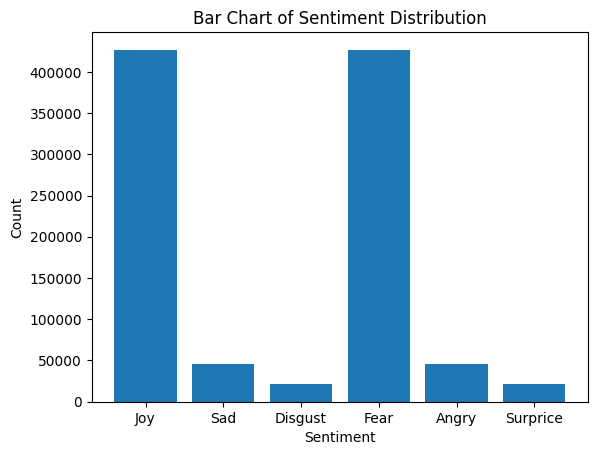

In [38]:
import matplotlib.pyplot as plt

label_0_data = df7[df7["Category"] == 'Joy']
label_1_data = df7[df7["Category"] == 'Sad']
label_2_data = df7[df7["Category"] == 'Disgust']
label_3_data = df7[df7["Category"] == 'Fear']
label_4_data = df7[df7["Category"] == 'Angry']
label_5_data = df7[df7["Category"] == 'Surprice']


label_0_size = len(label_0_data)
label_1_size = len(label_1_data)
label_2_size = len(label_2_data)
label_3_size = len(label_0_data)
label_4_size = len(label_1_data)
label_5_size = len(label_2_data)

labels = ['Joy', 'Sad', 'Disgust', 'Fear', 'Angry', 'Surprice']
sizes = [label_0_size, label_1_size, label_2_size, label_3_size, label_4_size, label_5_size]

plt.bar(labels, sizes)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Bar Chart of Sentiment Distribution')
plt.show()

In [39]:
df7 = df7[(df7['Text'].str.len() >= 1) & (df7['Text'].str.len() <= 200)]
df7

,Text,Category
0,assalam alikum اے ایمان والو میرے دشمنوں اپنے ...,Joy
19,best lines زما دہ ملگروں زمہ اُمرہ زامن وادہ س...,Joy
29,⁧ تنظیم سازی⁩ لیے طلال چوہدری قربانیاں مسلم لی...,Joy
35,⁦⁩ ہاں پتہ گیا,Sad
47,️مُجھے پَسند ️تُمھاری پِیشانی بوسہ ️اِقرارِ مُ...,Joy
...,...,...
1047993,کھیل دلچسپ مرحلے میں داخل ہوگیا تحقیقات کا آغا...,Joy
1047994,شکر فیصل بھائی آپ نے بھینس عمار مسعود کہا مجھے...,Joy
1047995,باتیں ڈیفنس والی اوقات شاہدرے والی,Joy
1047997,سیاستدان جتنی بھی کوششیں ملک سلامتی نقصان نہیں...,Joy


In [40]:
category_counts = df7['Category'].value_counts()

# Print the counts for each category
print("Category Counts:")
print(category_counts)

Category Counts:
Joy         422293
Sad          44957
Disgust      21450
Angry         2974
Fear          2242
Surprice      1376
Name: Category, dtype: int64


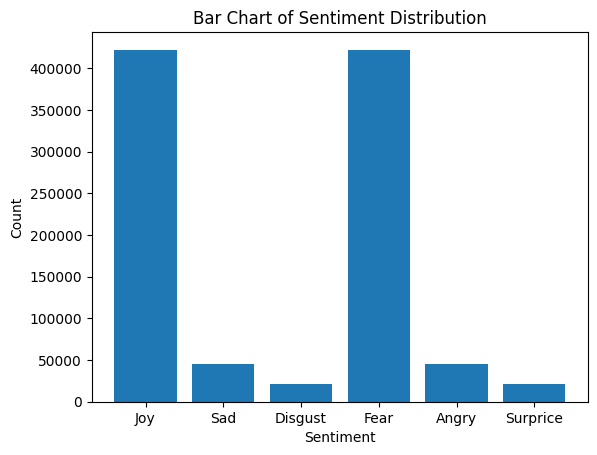

In [41]:
import matplotlib.pyplot as plt

label_0_data = df7[df7["Category"] == 'Joy']
label_1_data = df7[df7["Category"] == 'Sad']
label_2_data = df7[df7["Category"] == 'Disgust']
label_3_data = df7[df7["Category"] == 'Fear']
label_4_data = df7[df7["Category"] == 'Angry']
label_5_data = df7[df7["Category"] == 'Surprice']


label_0_size = len(label_0_data)
label_1_size = len(label_1_data)
label_2_size = len(label_2_data)
label_3_size = len(label_0_data)
label_4_size = len(label_1_data)
label_5_size = len(label_2_data)

labels = ['Joy', 'Sad', 'Disgust', 'Fear', 'Angry', 'Surprice']
sizes = [label_0_size, label_1_size, label_2_size, label_3_size, label_4_size, label_5_size]

plt.bar(labels, sizes)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Bar Chart of Sentiment Distribution')
plt.show()

## Oversampling

In [42]:
pip install -U imbalanced-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 3.0 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1


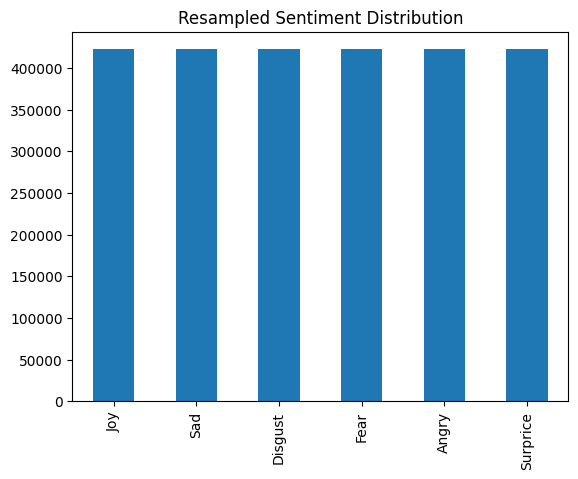

In [43]:
from imblearn.over_sampling import RandomOverSampler
import pandas as pd
X = df7[['Text']]
y = df7['Category']
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X, y)

df_resampled = pd.concat([pd.DataFrame(X_resampled, columns=['Text']), pd.DataFrame(y_resampled, columns=['Category'])], axis=1)
df_resampled['Category'].value_counts().plot(kind='bar', title='Resampled Sentiment Distribution')
plt.show()


#Undersampling

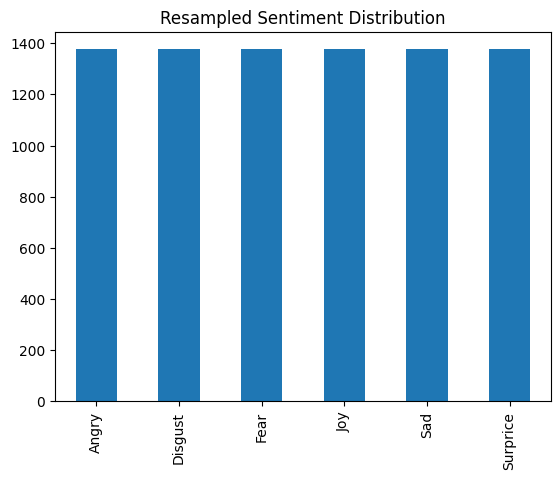

In [44]:
from imblearn.under_sampling import RandomUnderSampler
import pandas as pd
import matplotlib.pyplot as plt

X = df7[['Text']]
y = df7['Category']

undersampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X, y)

df_resampled = pd.concat([pd.DataFrame(X_resampled, columns=['Text']), pd.DataFrame(y_resampled, columns=['Category'])], axis=1)
df_resampled['Category'].value_counts().plot(kind='bar', title='Resampled Sentiment Distribution')
plt.show()


In [47]:
df_resampled

,Text,Category
836328,اس ملک بکی عدالتیں ۔۔۔,Angry
1010001,اویس نورانی ملک توڑنے بیان خلاف حکومت وقت سے ا...,Angry
761873,نوشی گیلانی صاحبہ بدبخت اپنی اوقات آگئے,Angry
208939,اوو پائی جان بوجھ لکھا ہانوں مانوں معاف کردیو ...,Angry
634548,بہت ناانصافی معصوم طوبی بلاک دیا اس کمپنی نے,Angry
...,...,...
1042080,ہم تـرے بعـد گـرے خستہ مکانـوں کـی طـرح کِھڑکی...,Surprice
1042847,وفات اسکی,Surprice
1043435,ہاتھ بھی پکڑا تھا کیا,Surprice
1046016,16 اکتوبر کا جلسہ کامیاب کرنا بیگم صفدر کا ائٹ...,Surprice


In [49]:
category_mapping = {'Joy': 0, 'Sad': 1, 'Disgust': 2, 'Fear': 3, 'Angry': 4, 'Surprice': 5}
df_resampled['label'] = df_resampled['Category'].map(category_mapping)

In [50]:
df_resampled

,Text,Category,label
836328,اس ملک بکی عدالتیں ۔۔۔,Angry,4
1010001,اویس نورانی ملک توڑنے بیان خلاف حکومت وقت سے ا...,Angry,4
761873,نوشی گیلانی صاحبہ بدبخت اپنی اوقات آگئے,Angry,4
208939,اوو پائی جان بوجھ لکھا ہانوں مانوں معاف کردیو ...,Angry,4
634548,بہت ناانصافی معصوم طوبی بلاک دیا اس کمپنی نے,Angry,4
...,...,...,...
1042080,ہم تـرے بعـد گـرے خستہ مکانـوں کـی طـرح کِھڑکی...,Surprice,5
1042847,وفات اسکی,Surprice,5
1043435,ہاتھ بھی پکڑا تھا کیا,Surprice,5
1046016,16 اکتوبر کا جلسہ کامیاب کرنا بیگم صفدر کا ائٹ...,Surprice,5


In [53]:
df_resampled.to_csv('undersampled_pp_data.csv', index=False)

In [ ]:
category_counts = df_resampled['Category'].value_counts()
print("Category Counts:")
print(category_counts)

Category Counts:
Joy         422293
Sad         422293
Disgust     422293
Fear        422293
Angry       422293
Surprice    422293
Name: Category, dtype: int64


In [ ]:
df_resampled

,Text,Category
0,assalam alikum اے ایمان والو میرے دشمنوں اپنے ...,Joy
1,best lines زما دہ ملگروں زمہ اُمرہ زامن وادہ س...,Joy
2,⁧ تنظیم سازی⁩ لیے طلال چوہدری قربانیاں مسلم لی...,Joy
3,⁦⁩ ہاں پتہ گیا,Sad
4,️مُجھے پَسند ️تُمھاری پِیشانی بوسہ ️اِقرارِ مُ...,Joy
...,...,...
2533753,اتنا چھوٹا,Surprice
2533754,کھانا زمین کمر میں درد نماز پڑھنے کرسی نہیں جا...,Surprice
2533755,please help اسکا جواب پنجابی میں,Surprice
2533756,نہیں,Surprice


# Data Sampling

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
categories = df_resampled['Category'].unique()
sampled_df = pd.DataFrame()
for category in categories:
    category_data = df_resampled[df_resampled['Category'] == category]
    if len(category_data) > 0:
        sampled_data, _ = train_test_split(category_data, test_size=(1 - 2180/len(category_data)), random_state=42, stratify=category_data['Category'])
        sampled_df = pd.concat([sampled_df, sampled_data])
sampled_df.reset_index(drop=True, inplace=True)
sampled_df


,Text,Category
0,ٹوئٹر سو سے زیادہ نواز شریف ظاہر مریم بھی پریش...,Joy
1,مہر صاحب ایں اپنا غداری ریا,Joy
2,تم بھی میری بھی میری,Joy
3,چا ہنے والوں بتا ؤ عزتیں اللہ دیتا,Joy
4,روٹی دا انتظام ہیگا,Joy
...,...,...
13075,پتہ نہیں ایسے نہیں رہا جیسے نکے نکے ابے کا گین...,Surprice
13076,اتنی بار ھاھاھاھاھا میں گن بھی نہیں پاٸی,Surprice
13077,کیا ہوگیا عبیرہ,Surprice
13078,اپنی حرکتوں سے باز نہیں رہا گندے سور نا جائز ا...,Surprice


In [ ]:
category_counts = sampled_df['Category'].value_counts()
print("Category Counts:")
print(category_counts)

Category Counts:
Joy         2180
Sad         2180
Disgust     2180
Fear        2180
Angry       2180
Surprice    2180
Name: Category, dtype: int64


In [ ]:
import pandas as pd
nan_counts = sampled_df.isna().sum()
print(nan_counts)

Text        0
Category    0
dtype: int64


#Label the category

In [ ]:
category_mapping = {'Joy': 0, 'Sad': 1, 'Disgust': 2, 'Fear': 3, 'Angry': 4, 'Surprice': 5}
sampled_df['label'] = sampled_df['Category'].map(category_mapping)

In [ ]:
sampled_df

,Text,Category,label
0,ٹوئٹر سو سے زیادہ نواز شریف ظاہر مریم بھی پریش...,Joy,0
1,مہر صاحب ایں اپنا غداری ریا,Joy,0
2,تم بھی میری بھی میری,Joy,0
3,چا ہنے والوں بتا ؤ عزتیں اللہ دیتا,Joy,0
4,روٹی دا انتظام ہیگا,Joy,0
...,...,...,...
13075,پتہ نہیں ایسے نہیں رہا جیسے نکے نکے ابے کا گین...,Surprice,5
13076,اتنی بار ھاھاھاھاھا میں گن بھی نہیں پاٸی,Surprice,5
13077,کیا ہوگیا عبیرہ,Surprice,5
13078,اپنی حرکتوں سے باز نہیں رہا گندے سور نا جائز ا...,Surprice,5


In [ ]:
sampled_df.to_csv('Urdu_sampled_dataset.csv', index=False)

In [ ]:
pp_ds_token =pd.read_csv("/content/drive/MyDrive/DS_CSE 438/UrduDataset/oversampled_pp_data.csv")

In [ ]:
import nltk
from nltk.tokenize import RegexpTokenizer

pp_ds_token['Text'] = pp_ds_token['Text'].astype(str)

urdu_tokenizer = RegexpTokenizer(r'\w+')
pp_ds_token['Text'] = pp_ds_token['Text'].apply(lambda text: urdu_tokenizer.tokenize(text))

In [ ]:
pp_ds_token

,Text,Category
0,"[assalam, alikum, اے, ایمان, والو, میرے, دشمنو...",Joy
1,"[best, lines, زما, دہ, ملگروں, زمہ, ا, مرہ, زا...",Joy
2,"[تنظیم, سازی, کے, لیے, طلال, چوہدری, کی, قربان...",Joy
3,"[ہاں, سب, پتہ, لگ, گیا]",Sad
4,"[م, جھے, پ, سند, ہے, ت, مھاری, پ, یشانی, پر, ب...",Joy
...,...,...
2560837,"[تسی, سیلبرٹی, لوگ, ہی, سمجھاؤ, ہماری, کون, سنتا]",Surprice
2560838,"[یہ, کون, ہے, جس, نے, بلاک, کیا, ہوا]",Surprice
2560839,"[ویسے, انکا, کچھ, پتہ, بھی, نہیں]",Surprice
2560840,"[کوئی, ہے, ادھر, انکا, کلاس, فیلو, جس, سے, یہ,...",Surprice


In [ ]:
category_mapping = {'Joy': 0, 'Sad': 1, 'Disgust': 2, 'Fear': 3, 'Angry': 4, 'Surprice': 5}
pp_ds_token['label'] = pp_ds_token['Category'].map(category_mapping)

In [ ]:
pp_ds_token

,Text,Category,label
0,"[assalam, alikum, اے, ایمان, والو, میرے, دشمنو...",Joy,0
1,"[best, lines, زما, دہ, ملگروں, زمہ, ا, مرہ, زا...",Joy,0
2,"[تنظیم, سازی, کے, لیے, طلال, چوہدری, کی, قربان...",Joy,0
3,"[ہاں, سب, پتہ, لگ, گیا]",Sad,1
4,"[م, جھے, پ, سند, ہے, ت, مھاری, پ, یشانی, پر, ب...",Joy,0
...,...,...,...
2560837,"[تسی, سیلبرٹی, لوگ, ہی, سمجھاؤ, ہماری, کون, سنتا]",Surprice,5
2560838,"[یہ, کون, ہے, جس, نے, بلاک, کیا, ہوا]",Surprice,5
2560839,"[ویسے, انکا, کچھ, پتہ, بھی, نہیں]",Surprice,5
2560840,"[کوئی, ہے, ادھر, انکا, کلاس, فیلو, جس, سے, یہ,...",Surprice,5


#EDA

## Basics descriptive Statics

In [ ]:
pp_ds =pd.read_csv("/content/drive/MyDrive/DS_CSE 438/Dataset/UrduDataset/oversampled_pp_data.csv")

In [ ]:
pp_ds

,Text,Category
0,assalam alikum اے ایمان والو میرے دشمنوں...,Joy
1,best lines زما دہ ملگروں زمہ اُمرہ زامن دی و...,Joy
2,⁧ تنظیم سازی⁩ کے لیے طلال چوہدری کی قربانیاں...,Joy
3,⁦⁩ ہاں سب پتہ لگ گیا,Sad
4,️مُجھے پَسند ہے ️تُمھاری پِیشانی پر بوسہ دے کر...,Joy
...,...,...
2560837,تسی سیلبرٹی لوگ ہی سمجھاؤ ہماری کون سنتا,Surprice
2560838,یہ کون ہے جس نے بلاک کیا ہوا,Surprice
2560839,ویسے انکا کچھ پتہ بھی نہیں۔,Surprice
2560840,کوئی ہے ادھر انکا کلاس فیلو جس سے یہ ڈرتی ہوں ...,Surprice


Number of Documents: 2560842
Average Document Length: 69.78 characters
Minimum Document Length: 1 characters
Maximum Document Length: 734 characters


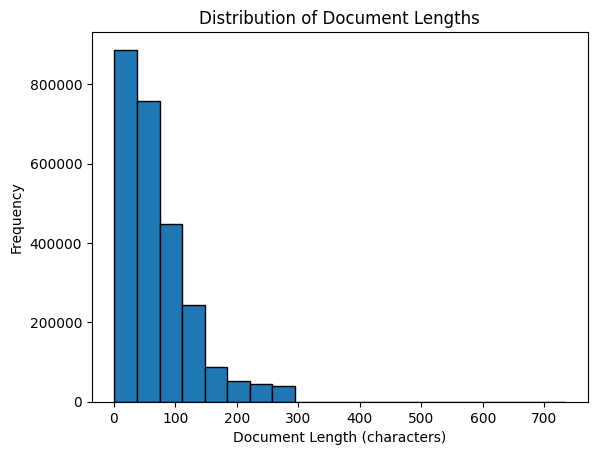

In [ ]:
import matplotlib.pyplot as plt


text_lengths = pp_ds['Text'].apply(lambda x: len(str(x)) if isinstance(x, (str, float)) else 0)


num_documents = len(pp_ds)
average_length = text_lengths.mean()
min_length = text_lengths.min()
max_length = text_lengths.max()


print(f"Number of Documents: {num_documents}")
print(f"Average Document Length: {average_length:.2f} characters")
print(f"Minimum Document Length: {min_length} characters")
print(f"Maximum Document Length: {max_length} characters")


plt.hist(text_lengths, bins=20, edgecolor='black')
plt.title('Distribution of Document Lengths')
plt.xlabel('Document Length (characters)')
plt.ylabel('Frequency')
plt.show()


In [ ]:
from collections import Counter
import matplotlib.pyplot as plt
import nltk

nltk.download('punkt')

def preprocess_text(text):
    return str(text).lower()

pp_ds['Text'] = pp_ds['Text'].apply(preprocess_text)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Most Common Words:
ہے: 954464 times
میں: 808223 times
کے: 707952 times
کی: 673220 times
سے: 567885 times
تو: 552844 times
نہیں: 538356 times
کو: 509659 times
اور: 449689 times
ہیں: 446050 times

Least Common Words:
رکہلے: 1 times
سِنگم: 1 times
صحت…: 1 times
ہے۔۔زرا: 1 times
آئے۔اور: 1 times
ابوطالبؑ: 1 times
چہیچڑیاں: 1 times
گھونچوں: 1 times
بادشاھ: 1 times
بادشاھی: 1 times


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 1729 (\N{ARABIC LETTER HEH GOAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Matplotlib currently does not support Arabic natively.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 1746 (\N{ARABIC LETTER YEH BARREE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


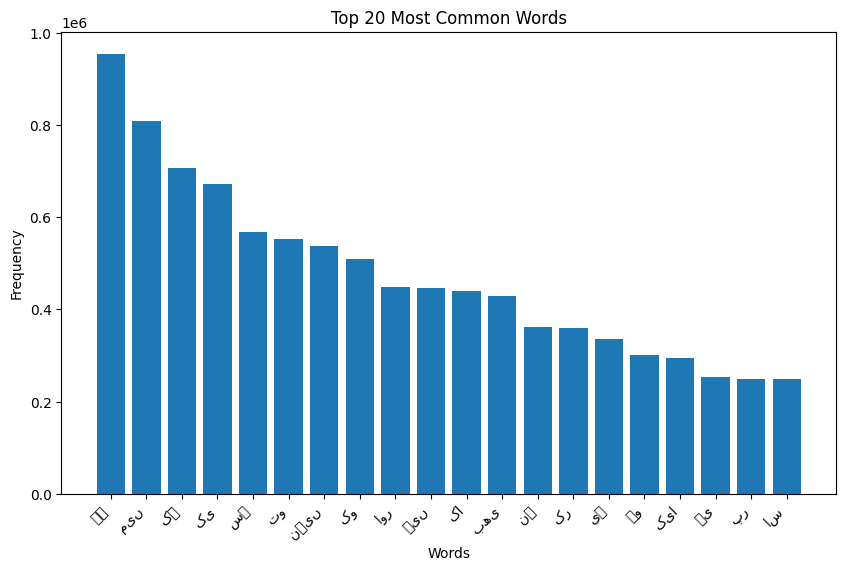

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')

all_words = pp_ds['Text'].apply(nltk.word_tokenize).explode()


word_frequencies = Counter(all_words)


print("Most Common Words:")
for word, frequency in word_frequencies.most_common(10):
    print(f"{word}: {frequency} times")

print("\nLeast Common Words:")
for word, frequency in word_frequencies.most_common()[:-11:-1]:
    print(f"{word}: {frequency} times")

plt.figure(figsize=(10, 6))
plt.bar(*zip(*word_frequencies.most_common(20)))
plt.title('Top 20 Most Common Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()


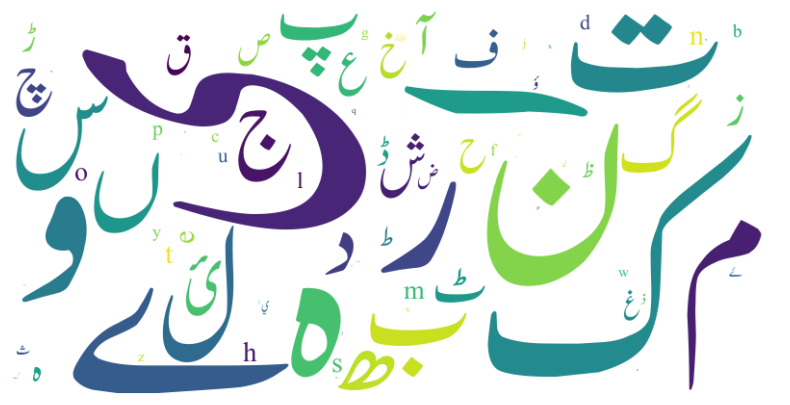

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import os

font_filename = "/content/drive/MyDrive/NLP1_CSE431/for_urdu_1st_paper/urdu_dataset/Jameel Noori Nastaleeq.ttf"
font_path = os.path.abspath(font_filename)
label_0_data = pp_ds[pp_ds['Category'] == 'Joy']
urdu_text = ' '.join(map(str, label_0_data['Text'].apply(lambda x: ' '.join(x))))

wordcloud = WordCloud(
    width=800,
    height=400,
    font_path=font_path,
    background_color='white',
    collocations=False
).generate(urdu_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


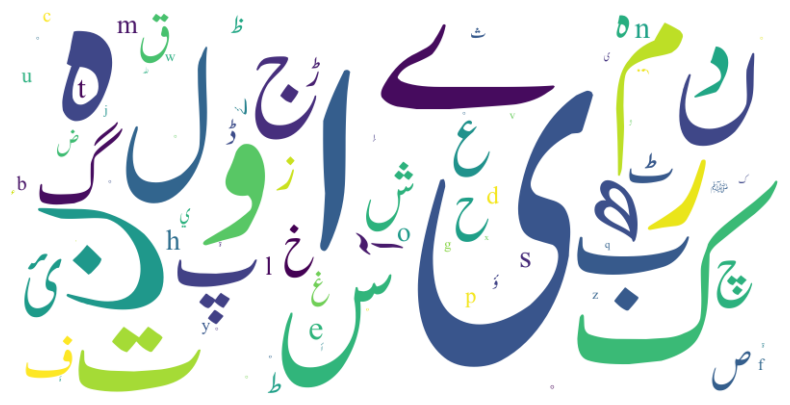

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import os

font_filename = "/content/drive/MyDrive/NLP1_CSE431/for_urdu_1st_paper/urdu_dataset/Jameel Noori Nastaleeq.ttf"
font_path = os.path.abspath(font_filename)
label_1_data = pp_ds[pp_ds['Category'] == 'Sad']
urdu_text = ' '.join(map(str, label_1_data['Text'].apply(lambda x: ' '.join(x))))

wordcloud = WordCloud(
    width=800,
    height=400,
    font_path=font_path,
    background_color='white',
    collocations=False
).generate(urdu_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


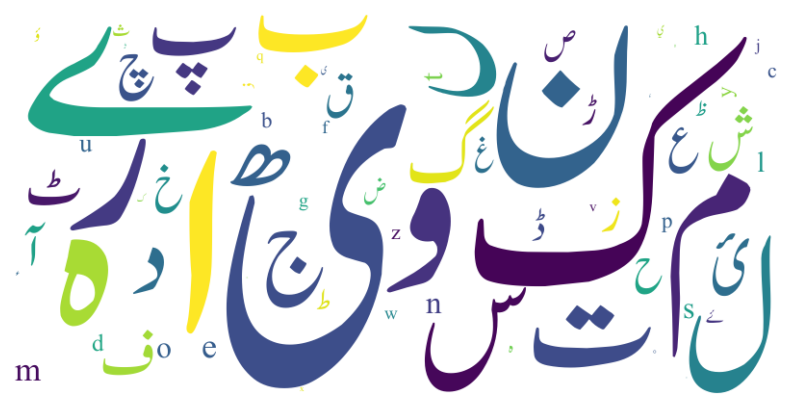

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import os

font_filename = "/content/drive/MyDrive/NLP1_CSE431/for_urdu_1st_paper/urdu_dataset/Jameel Noori Nastaleeq.ttf"
font_path = os.path.abspath(font_filename)
label_1_data = pp_ds[pp_ds['Category'] == 'Fear']
urdu_text = ' '.join(map(str, label_1_data['Text'].apply(lambda x: ' '.join(x))))

wordcloud = WordCloud(
    width=800,
    height=400,
    font_path=font_path,
    background_color='white',
    collocations=False
).generate(urdu_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


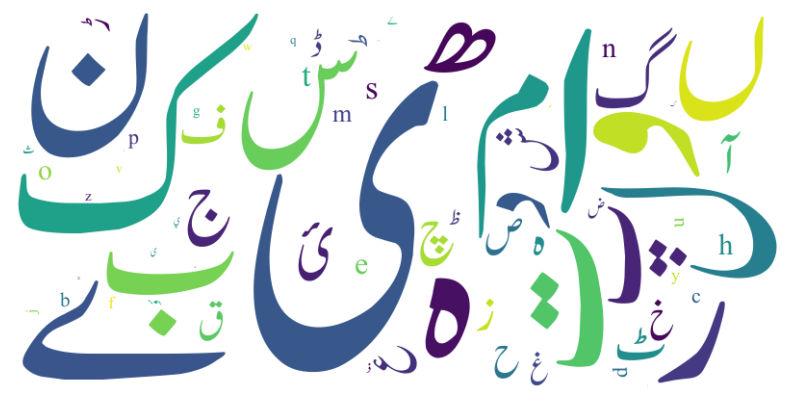

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import os

font_filename = "/content/drive/MyDrive/NLP1_CSE431/for_urdu_1st_paper/urdu_dataset/Jameel Noori Nastaleeq.ttf"
font_path = os.path.abspath(font_filename)
label_1_data = pp_ds[pp_ds['Category'] == 'Surprice']
urdu_text = ' '.join(map(str, label_1_data['Text'].apply(lambda x: ' '.join(x))))

wordcloud = WordCloud(
    width=800,
    height=400,
    font_path=font_path,
    background_color='white',
    collocations=False
).generate(urdu_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


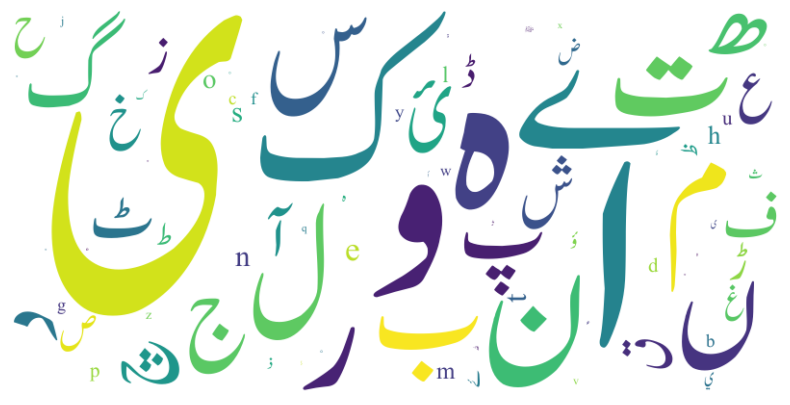

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import os

font_filename = "/content/drive/MyDrive/NLP1_CSE431/for_urdu_1st_paper/urdu_dataset/Jameel Noori Nastaleeq.ttf"
font_path = os.path.abspath(font_filename)
label_1_data = pp_ds[pp_ds['Category'] == 'Disgust']
urdu_text = ' '.join(map(str, label_1_data['Text'].apply(lambda x: ' '.join(x))))

wordcloud = WordCloud(
    width=800,
    height=400,
    font_path=font_path,
    background_color='white',
    collocations=False
).generate(urdu_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [ ]:
pp_ds.groupby("Category").describe()

Text                                                             \
           count  unique                                                top   
Category                                                                      
Angry     426807    3053  یاد رہے کہ آج کا دن سانحہ کارساز کی یاد میں من...   
Disgust   426807   21642  ﮐﺒﮭﯽ ﺁﻧﮑﮭﻮﮞ ﻣﯿﮟ ﺟﻠﻦ ﮨﻮ ﺗﻮ ﮔﮭﺮ ﭘﮧ ﮐﺴﯽ ﮐﻮ ﺑﮭﯽ ﻣﺖ...   
Fear      426807    2312                   مطلب اب لازمی لانا پڑیگا بہن کو    
Joy       426805  426805       assalam alikum  اے ایمان والو میرے دشمنوں...   
Sad       426807   45893                                 میری وی نیں ہو رہی   
Surprice  426807    1397                                          ہے بگھوان   

               
         freq  
Category       
Angry     187  
Disgust    39  
Fear      236  
Joy         1  
Sad        24  
Surprice  364

In [ ]:
pp_ds

,Text,Category
0,assalam alikum اے ایمان والو میرے دشمنوں...,Joy
1,best lines زما دہ ملگروں زمہ اُمرہ زامن دی و...,Joy
2,⁧ تنظیم سازی⁩ کے لیے طلال چوہدری کی قربانیاں...,Joy
3,⁦⁩ ہاں سب پتہ لگ گیا,Sad
4,️مُجھے پَسند ہے ️تُمھاری پِیشانی پر بوسہ دے کر...,Joy
...,...,...
2560837,تسی سیلبرٹی لوگ ہی سمجھاؤ ہماری کون سنتا,Surprice
2560838,یہ کون ہے جس نے بلاک کیا ہوا,Surprice
2560839,ویسے انکا کچھ پتہ بھی نہیں۔,Surprice
2560840,کوئی ہے ادھر انکا کلاس فیلو جس سے یہ ڈرتی ہوں ...,Surprice


In [ ]:
category_mapping = {'Joy': 0, 'Sad': 1, 'Disgust': 2, 'Fear': 3, 'Angry': 4, 'Surprice': 5}
pp_ds['label'] = pp_ds['Category'].map(category_mapping)

In [ ]:
pp_ds

,Text,Category,label
0,assalam alikum اے ایمان والو میرے دشمنوں...,Joy,0
1,best lines زما دہ ملگروں زمہ اُمرہ زامن دی و...,Joy,0
2,⁧ تنظیم سازی⁩ کے لیے طلال چوہدری کی قربانیاں...,Joy,0
3,⁦⁩ ہاں سب پتہ لگ گیا,Sad,1
4,️مُجھے پَسند ہے ️تُمھاری پِیشانی پر بوسہ دے کر...,Joy,0
...,...,...,...
2560837,تسی سیلبرٹی لوگ ہی سمجھاؤ ہماری کون سنتا,Surprice,5
2560838,یہ کون ہے جس نے بلاک کیا ہوا,Surprice,5
2560839,ویسے انکا کچھ پتہ بھی نہیں۔,Surprice,5
2560840,کوئی ہے ادھر انکا کلاس فیلو جس سے یہ ڈرتی ہوں ...,Surprice,5


In [ ]:
category_counts = pp_ds['Category'].value_counts()
print(category_counts)

Joy         426807
Sad         426807
Disgust     426807
Fear        426807
Angry       426807
Surprice    426807
Name: Category, dtype: int64


In [ ]:
na_count = pp_ds['label'].isna().sum()
na_count1 = pp_ds['Category'].isna().sum()
na_count2 = pp_ds['Text'].isna().sum()

print("Number of NaN values in the 'Label' column:", na_count)
print("Number of NaN values in the 'Catagory' column:", na_count1)
print("Number of NaN values in the 'Text' column:", na_count2)


Number of NaN values in the 'Label' column: 0
Number of NaN values in the 'Catagory' column: 0
Number of NaN values in the 'Text' column: 2


In [ ]:
pp_ds = pp_ds.dropna()
pp_ds

,Text,Category,label
0,assalam alikum اے ایمان والو میرے دشمنوں...,Joy,0
1,best lines زما دہ ملگروں زمہ اُمرہ زامن دی و...,Joy,0
2,⁧ تنظیم سازی⁩ کے لیے طلال چوہدری کی قربانیاں...,Joy,0
3,⁦⁩ ہاں سب پتہ لگ گیا,Sad,1
4,️مُجھے پَسند ہے ️تُمھاری پِیشانی پر بوسہ دے کر...,Joy,0
...,...,...,...
2560837,تسی سیلبرٹی لوگ ہی سمجھاؤ ہماری کون سنتا,Surprice,5
2560838,یہ کون ہے جس نے بلاک کیا ہوا,Surprice,5
2560839,ویسے انکا کچھ پتہ بھی نہیں۔,Surprice,5
2560840,کوئی ہے ادھر انکا کلاس فیلو جس سے یہ ڈرتی ہوں ...,Surprice,5


In [ ]:
na_count = pp_ds['label'].isna().sum()
na_count1 = pp_ds['Category'].isna().sum()
na_count2 = pp_ds['Text'].isna().sum()

print("Number of NaN values in the 'Label' column:", na_count)
print("Number of NaN values in the 'Catagory' column:", na_count1)
print("Number of NaN values in the 'Text' column:", na_count2)


Number of NaN values in the 'Label' column: 0
Number of NaN values in the 'Catagory' column: 0
Number of NaN values in the 'Text' column: 0


In [ ]:
pp_ds

,Text,Category,label
0,assalam alikum اے ایمان والو میرے دشمنوں...,Joy,0
1,best lines زما دہ ملگروں زمہ اُمرہ زامن دی و...,Joy,0
2,⁧ تنظیم سازی⁩ کے لیے طلال چوہدری کی قربانیاں...,Joy,0
3,⁦⁩ ہاں سب پتہ لگ گیا,Sad,1
4,️مُجھے پَسند ہے ️تُمھاری پِیشانی پر بوسہ دے کر...,Joy,0
...,...,...,...
2560837,تسی سیلبرٹی لوگ ہی سمجھاؤ ہماری کون سنتا,Surprice,5
2560838,یہ کون ہے جس نے بلاک کیا ہوا,Surprice,5
2560839,ویسے انکا کچھ پتہ بھی نہیں۔,Surprice,5
2560840,کوئی ہے ادھر انکا کلاس فیلو جس سے یہ ڈرتی ہوں ...,Surprice,5


In [ ]:
pp_ds = pp_ds[(pp_ds['Text'].str.len() >= 1) & (pp_ds['Text'].str.len() <= 300)]


In [ ]:
pp_ds

,Text,Category,label
0,assalam alikum اے ایمان والو میرے دشمنوں...,Joy,0
1,best lines زما دہ ملگروں زمہ اُمرہ زامن دی و...,Joy,0
2,⁧ تنظیم سازی⁩ کے لیے طلال چوہدری کی قربانیاں...,Joy,0
3,⁦⁩ ہاں سب پتہ لگ گیا,Sad,1
4,️مُجھے پَسند ہے ️تُمھاری پِیشانی پر بوسہ دے کر...,Joy,0
...,...,...,...
2560837,تسی سیلبرٹی لوگ ہی سمجھاؤ ہماری کون سنتا,Surprice,5
2560838,یہ کون ہے جس نے بلاک کیا ہوا,Surprice,5
2560839,ویسے انکا کچھ پتہ بھی نہیں۔,Surprice,5
2560840,کوئی ہے ادھر انکا کلاس فیلو جس سے یہ ڈرتی ہوں ...,Surprice,5


In [ ]:
pp_ds.to_csv('Urdudatasetfinal.csv', index=False)